# Machine Learning: Intro a sistemas de recomendação em Python

Alura: https://cursos.alura.com.br/course/introducao-a-sistemas-de-recomendacao-com-python

***

- Pense em heurísticas e algoritmos
- Gere recomendações baseadas em similaridade de usuários
- Crie sistemas baseados em filtros colaborativos
- Recomende baseado em modelos de itens e usuários
- Implemente K-Nearest-Neighbours do zero
- Entenda os desafios de recomendação

# LIBS

In [1]:
import pandas as pd

# 01 - Heurística de recomendação e entendendo o que é colaboração

In [2]:
filmes = pd.read_csv('./Data/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
notas = pd.read_csv('./Data/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## PRIMEIRA TENTATIVA DE RECOMENDACAO

In [5]:
total_votos = notas['filmeId'].value_counts()
total_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [6]:
filmes.loc[356]

titulo         Forrest Gump (1994)
genero    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [7]:
filmes['total_de_votos'] = total_votos
filmes.head()

,titulo,genero,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [8]:
filmes.sort_values(by='total_de_votos', ascending = False).head()

,titulo,genero,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


# Total de votos, nota média e possíveis dificuldades de heurísticas simples

In [9]:
filmes.sort_values(by='total_de_votos', ascending = False).head(10)

,titulo,genero,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [10]:
notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [11]:
filmes['nota_media'] = notas_medias
filmes.sort_values(by='total_de_votos', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


## SEGUNDA HEURÍSTICA

In [12]:
filmes.sort_values(by='nota_media', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [13]:
filmes.query('total_de_votos >=10').sort_values(by='nota_media', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [14]:
filmes_com_mais_de_50_votos = filmes.query('total_de_votos >=50')
filmes_com_mais_de_50_votos.sort_values(by='nota_media', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


# Recomendação baseada em similaridade de genero

In [15]:
eu_assisti = [1, 21, 14, 58, 14, 32]
filmes.loc[eu_assisti]

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
14,Nixon (1995),Drama,18.0,3.833333
58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,37.0,4.027027
14,Nixon (1995),Drama,18.0,3.833333
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177.0,3.983051


In [16]:
comedy_crime_thriller = filmes_com_mais_de_50_votos.query("genero=='Comedy|Crime|Thriller'").sort_values(by='nota_media', ascending = False).head(10)

comedy_crime_thriller

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
4011,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914
2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,67.0,4.052239
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382


In [17]:
comedy_crime_thriller.drop(eu_assisti, errors='ignore').sort_values(by='nota_media', ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
4011,Snatch (2000),Comedy|Crime|Thriller,93.0,4.155914
2542,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,67.0,4.052239


# Definindo a distância euclidiana entre usuários

In [18]:
import matplotlib.pyplot as plt

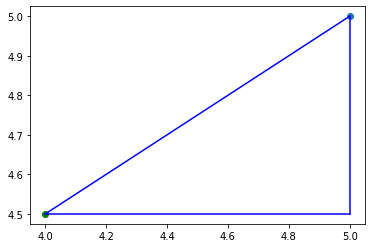

In [19]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'o')

plt.plot([4, 5], [4.5, 4.5], color = 'b', linestyle = '-')
plt.plot([4, 5], [4.5, 5],  color = 'b', linestyle = '-')
plt.plot([5, 5], [4.5, 5],  color = 'b', linestyle = '-')

In [20]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [21]:
from math import sqrt

def pitagoras(a,b):
    (delta_x, delta_y) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [22]:
np.linalg.norm(joao - maria)

1.118033988749895

In [23]:
def diferenca_de_vetores(a, b):
    return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

1.118033988749895
0.5


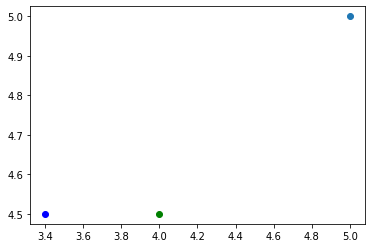

In [24]:
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'o')
plt.plot(3.4, 4.5, 'bo')

joao = np.array([4, 4.5])
maria = np.array([5, 5])
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

# Implementando a distância entre usuários no nosso dataset

In [25]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query('usuarioId==%d' % usuario)
    notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')
    return notas_do_usuario

#notas_do_usuario.loc[3809]

In [26]:
notas_do_usuario(4)

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0
...,...
4765,5.0
4881,3.0
4896,4.0


In [27]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

diferencas = usuario1.join(usuario4, lsuffix='esquerda', rsuffix = 'direita').dropna()

In [28]:
diferenca_de_vetores(diferencas['notaesquerda'], diferencas['notadireita'])

11.135528725660043

In [29]:
def distancia_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    
    diferencas = notas1.join(notas2, lsuffix='esquerda', rsuffix = 'direita').dropna()
    distancia = diferenca_de_vetores(diferencas['notaesquerda'], diferencas['notadireita'])
    return usuario_id1, usuario_id2, distancia

In [30]:
distancia_usuarios(1, 4)

(1, 4, 11.135528725660043)

# Calculando a distância entre um e todos os usuários

In [31]:
def distancia_para_todos(voce_id):
    distancia = []
    for id_usuario in notas['usuarioId'].unique():
        informacoes = distancia_usuarios(voce_id, id_usuario)
        distancia.append(informacoes)
        
    return distancia

distancia_para_todos(1)[:5]

[(1, 1, 0.0),
 (1, 2, 1.4142135623730951),
 (1, 3, 8.200609733428363),
 (1, 4, 11.135528725660043),
 (1, 5, 3.7416573867739413)]

In [32]:
def distancia_de_todos(voce_id):
    todos_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_usuarios(voce_id, id_usuario) for id_usuario in todos_usuarios]
    distancias = pd.DataFrame(distancias, columns =['voce', 'outra_pessoa', 'distancia'])
    return distancias

distancia_de_todos(1)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
...,...,...,...
605,1,606,11.510864
606,1,607,9.899495
607,1,608,18.241436
608,1,609,3.162278


# Ordenando usuários por distância e lidando com casos extremos

## Usuários sem nada em comum são colocados distantes um dos outros

In [37]:
def distancia_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    
    diferencas = notas1.join(notas2, lsuffix='esquerda', rsuffix = 'direita').dropna()
    
    if(len(diferencas) < minimo):
        return [usuario_id1, usuario_id2, 100000]
    
    distancia = diferenca_de_vetores(diferencas['notaesquerda'], diferencas['notadireita'])
    return usuario_id1, usuario_id2, distancia

In [38]:
def distancia_para_todos(voce_id):
    distancia = []
    for id_usuario in notas['usuarioId'].unique():
        informacoes = distancia_usuarios(voce_id, id_usuario)
        distancia.append(informacoes)
        
    return distancia

distancia_para_todos(1)[:5]

[(1, 1, 0.0),
 [1, 2, 100000],
 (1, 3, 8.200609733428363),
 (1, 4, 11.135528725660043),
 (1, 5, 3.7416573867739413)]

In [41]:
def mais_proximos_de(voce_id):
    distancias = distancia_de_todos(voce_id)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    
    return distancias

In [42]:
mais_proximos_de(1)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,100000.000000
60,1,100000.000000
576,1,100000.000000


# Gerando recomendações baseado em um usuário

In [60]:
def mais_proximos_de(voce_id, n = None):
    distancias = distancia_de_todos(voce_id, n = n)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    
    return distancias



def distancia_de_todos(voce_id, n = None):
    todos_usuarios = notas['usuarioId'].unique()
    
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
        
    distancias = [distancia_usuarios(voce_id, usuario_id) for usuario_id in todos_usuarios]
    distancias = pd.DataFrame(distancias, columns =['voce', 'outra_pessoa', 'distancia'])
    return distancias





In [63]:
mais_proximos_de(1)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,100000.000000
60,1,100000.000000
576,1,100000.000000
